# 04 LSTM Eğitimi

In [2]:
import pandas as pd
import sys
sys.path.append("../..")
from src.config import PROJECT_ROOT
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split


In [2]:
df = pd.read_parquet(PROJECT_ROOT.joinpath('data/interim/sample.parquet'))
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1

data_array = df.values


In [3]:

PCA_COMPONENTS = 5
dataset = TrafficDataset(
    data_array,
    X_STEP,
    Y_STEP,
    #pca_components=PCA_COMPONENTS
)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds,batch_size=10, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=10)


In [4]:
sensors = dataset.sensors
print(sensors)

8600


  >> Model saved to /home/orhankocak_0233/MLProject_570/models/lstm.pt (val_loss improved)
Epoch 1/500  Train Loss: 14099.5869  Val Loss: 18065.9727  Val MSE: 18065.9707  Val R2: -1.7327
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/lstm.pt (val_loss improved)
Epoch 2/500  Train Loss: 14098.6367  Val Loss: 18064.9531  Val MSE: 18064.9570  Val R2: -1.7325
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/lstm.pt (val_loss improved)
Epoch 3/500  Train Loss: 14097.6328  Val Loss: 18063.8418  Val MSE: 18063.8438  Val R2: -1.7324
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/lstm.pt (val_loss improved)
Epoch 4/500  Train Loss: 14096.5273  Val Loss: 18062.5996  Val MSE: 18062.6016  Val R2: -1.7322
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/lstm.pt (val_loss improved)
Epoch 5/500  Train Loss: 14095.2920  Val Loss: 18061.2031  Val MSE: 18061.2051  Val R2: -1.7320
  >> Model saved to /home/orhankocak_0233/MLProject_570/models/ls

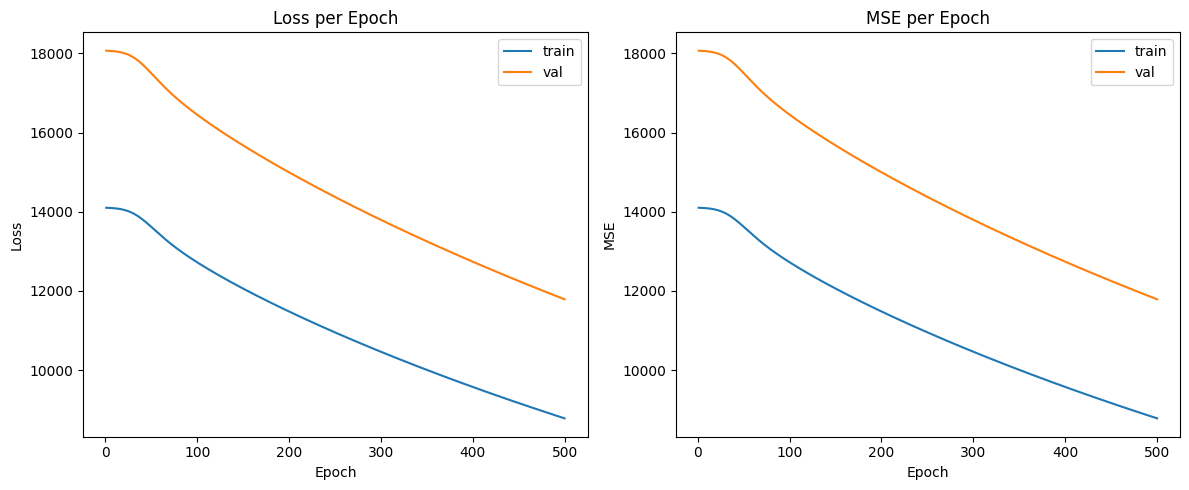

== Final Metrics ==
mse: 11787.0625
mae: 79.50120544433594
r2: -0.7829314470291138


In [ ]:
predictor = TrafficPredictor(
    'lstm',
    sensors,
    X_STEP,
    Y_STEP,
    #pca_model=dataset.pca
)
predictor.train(train_loader, val_loader, epochs=10, 
                save_path=PROJECT_ROOT.joinpath("models/lstm.pt"), 
                save_optimizer=True)
predictor.show()
